# Лабораторная работа №8 (Проведение исследований моделями обнаружения и распознавания объектов)

## 1.	Выбор начальных условий
## Был выбран подходящий для задачи [датасет](https://www.kaggle.com/datasets/barzansaeedpour/traffic-sign-detection). Нейросеть обученая на нём может быть полезна в обнаружение дорожных знаков. Этот функционал могут использовать как в автономной системе управления машиной, так и для уведомления о них водителя транспортного средства.

## метрики, которые будем использовать: map, map50


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found exi

# 2.	Создание бейзлайна и оценка качества


In [6]:
from ultralytics import YOLO


model = YOLO("yolov8n.pt") 


model.train(data=r"/kaggle/input/wwwwwww/data_custom.yaml", epochs=50, imgsz=640, batch=16, device=0)

Ultralytics 8.3.135 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/wwwwwww/data_custom.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pr

train: Scanning /kaggle/input/traffic-sign-detection/train/labels... 678 images, 0 backgrounds, 0 corrupt: 100%|██████████| 678/678 [00:00<00:00, 1193.20it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/traffic-sign-detection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.4±1.7 ms, read: 305.1±136.1 MB/s, size: 528.0 KB)


val: Scanning /kaggle/input/traffic-sign-detection/val/labels... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<00:00, 559.05it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/traffic-sign-detection/val is not writeable, cache not saved.


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000256, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.26G       1.38      6.878     0.9333          8        640: 100%|██████████| 43/43 [00:13<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.37it/s]

                   all         25         31          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.28G      1.218      5.616     0.8486         14        640: 100%|██████████| 43/43 [00:11<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]

                   all         25         31     0.0444      0.456      0.124     0.0923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.28G      1.196      5.113      0.826         12        640: 100%|██████████| 43/43 [00:10<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         25         31      0.058      0.737      0.302      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.28G      1.071      4.395     0.8254         11        640: 100%|██████████| 43/43 [00:11<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         25         31      0.544      0.288       0.33      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.28G      1.008      3.989     0.8276         12        640: 100%|██████████| 43/43 [00:10<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


                   all         25         31       0.44      0.401      0.349      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.28G     0.9505      3.588     0.8241          6        640: 100%|██████████| 43/43 [00:10<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         25         31      0.448      0.371      0.361      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.29G     0.9201      3.476     0.8304          8        640: 100%|██████████| 43/43 [00:10<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]


                   all         25         31      0.435      0.452      0.476      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.3G     0.9093        3.2     0.8231         18        640: 100%|██████████| 43/43 [00:10<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


                   all         25         31      0.568       0.49      0.565      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.3G     0.8933      2.876     0.8224         18        640: 100%|██████████| 43/43 [00:10<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         25         31      0.672      0.528      0.592      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.3G     0.8635      2.697     0.8188         16        640: 100%|██████████| 43/43 [00:09<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]


                   all         25         31      0.666      0.561      0.563      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.3G     0.8423      2.537     0.8095         14        640: 100%|██████████| 43/43 [00:10<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         25         31        0.7      0.593      0.686      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.3G     0.8399      2.327     0.8148         10        640: 100%|██████████| 43/43 [00:11<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]


                   all         25         31      0.532      0.794      0.743      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.3G     0.8254      2.163     0.8107         11        640: 100%|██████████| 43/43 [00:11<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]


                   all         25         31      0.762      0.683      0.774      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.3G     0.8132      2.053     0.8123         15        640: 100%|██████████| 43/43 [00:11<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         25         31      0.613      0.798      0.816      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       2.3G     0.7629      1.929     0.8149         10        640: 100%|██████████| 43/43 [00:11<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]


                   all         25         31        0.6      0.825      0.866      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.3G     0.7818      1.818     0.8163         10        640: 100%|██████████| 43/43 [00:09<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]


                   all         25         31      0.616      0.811      0.882      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.3G     0.7485      1.717     0.8067         14        640: 100%|██████████| 43/43 [00:11<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]


                   all         25         31      0.675      0.817       0.89      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       2.3G     0.7659      1.687     0.8051         14        640: 100%|██████████| 43/43 [00:10<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]


                   all         25         31      0.704      0.773       0.92      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.31G     0.7367      1.663     0.8065         14        640: 100%|██████████| 43/43 [00:10<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]


                   all         25         31      0.762      0.754      0.955      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.32G     0.7141      1.524     0.8025         19        640: 100%|██████████| 43/43 [00:10<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]


                   all         25         31      0.838      0.819      0.962      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.33G     0.7204        1.5     0.8098         11        640: 100%|██████████| 43/43 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]


                   all         25         31      0.807      0.763       0.94      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.33G     0.6931      1.477     0.8073         16        640: 100%|██████████| 43/43 [00:10<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


                   all         25         31      0.643      0.939      0.929      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.34G     0.7027      1.435     0.8029         15        640: 100%|██████████| 43/43 [00:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         25         31      0.762      0.876      0.965      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.36G     0.6858      1.379     0.8011         12        640: 100%|██████████| 43/43 [00:11<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


                   all         25         31      0.859      0.823      0.927      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.37G     0.6852      1.349     0.8057         14        640: 100%|██████████| 43/43 [00:09<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         25         31      0.794      0.876      0.946      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.39G      0.673      1.331     0.7991         11        640: 100%|██████████| 43/43 [00:09<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         25         31       0.86      0.785      0.912      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.4G      0.694      1.337     0.7939         11        640: 100%|██████████| 43/43 [00:10<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


                   all         25         31      0.659      0.974      0.937      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       2.4G     0.6768      1.248      0.803         15        640: 100%|██████████| 43/43 [00:10<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


                   all         25         31      0.878      0.798      0.963      0.794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.4G     0.6727      1.242     0.8035         15        640: 100%|██████████| 43/43 [00:12<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]


                   all         25         31      0.626      0.991      0.967      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.41G     0.6549      1.262     0.7971         10        640: 100%|██████████| 43/43 [00:11<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


                   all         25         31      0.828      0.881      0.953      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.41G     0.6666      1.216     0.7928          8        640: 100%|██████████| 43/43 [00:10<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]


                   all         25         31      0.767      0.937      0.952      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.41G     0.6416       1.17      0.798         11        640: 100%|██████████| 43/43 [00:11<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]


                   all         25         31      0.763      0.981      0.947      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.41G     0.6759      1.178     0.8057         15        640: 100%|██████████| 43/43 [00:11<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


                   all         25         31      0.759      0.944       0.96      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.41G     0.6522      1.119     0.8059         14        640: 100%|██████████| 43/43 [00:10<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         25         31      0.804      0.939      0.963      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.41G     0.6568      1.127     0.7939         16        640: 100%|██████████| 43/43 [00:10<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         25         31      0.856      0.886      0.962      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.41G     0.6324      1.122     0.7994         12        640: 100%|██████████| 43/43 [00:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         25         31      0.824      0.981      0.944      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.41G     0.6339      1.097     0.7975         10        640: 100%|██████████| 43/43 [00:11<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]


                   all         25         31       0.78      0.986      0.945      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.41G     0.6368      1.084     0.7923         19        640: 100%|██████████| 43/43 [00:12<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         25         31      0.817      0.936      0.944      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.41G     0.6407      1.101     0.8073         18        640: 100%|██████████| 43/43 [00:11<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


                   all         25         31      0.811      0.939      0.988      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.41G     0.6074      1.051     0.7996         11        640: 100%|██████████| 43/43 [00:11<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]


                   all         25         31      0.816      0.939      0.987      0.829
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.41G     0.6166      1.348     0.8017          7        640: 100%|██████████| 43/43 [00:12<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]


                   all         25         31       0.84      0.874      0.989      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.41G     0.6094      1.293     0.7927          5        640: 100%|██████████| 43/43 [00:11<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         25         31      0.765      0.988      0.979       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.41G     0.5955      1.252     0.7875          8        640: 100%|██████████| 43/43 [00:12<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


                   all         25         31      0.779      0.931       0.98      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.41G     0.6026      1.279      0.802          8        640: 100%|██████████| 43/43 [00:12<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]


                   all         25         31      0.712      0.991       0.99      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.41G     0.5667      1.237     0.7827          6        640: 100%|██████████| 43/43 [00:12<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


                   all         25         31      0.849      0.939       0.99      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.41G     0.5825      1.234     0.7898          7        640: 100%|██████████| 43/43 [00:11<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         25         31      0.786      0.991       0.99      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.41G     0.5676      1.227     0.7871          9        640: 100%|██████████| 43/43 [00:11<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         25         31      0.784      0.991      0.989      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.41G     0.5684      1.193     0.7909          5        640: 100%|██████████| 43/43 [00:11<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         25         31      0.747      0.991      0.989      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.41G     0.5656      1.198     0.7864          8        640: 100%|██████████| 43/43 [00:10<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]


                   all         25         31      0.801      0.991      0.989      0.853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.41G      0.565      1.188     0.7966          7        640: 100%|██████████| 43/43 [00:11<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]

                   all         25         31      0.794      0.991      0.989      0.861



50 epochs completed in 0.166 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.135 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,012,473 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]


                   all         25         31      0.712      0.991       0.99      0.871
   avalin-pich-be-chap          1          1      0.679          1      0.995      0.796
   avalin-pich-be-rast          3          3      0.824          1      0.995      0.965
            dast-andaz          1          1      0.669          1      0.995      0.995
faghat-obor-az-rast-mojaz          1          1      0.612          1      0.995      0.895
hadeaksar-sorat-mojaz-40          1          1      0.655          1      0.995      0.895
hadeaksar-sorat-mojaz-80          1          1      0.828          1      0.995      0.895
hadeaksar-sorat-mojaz-85          1          1      0.832          1      0.995      0.697
hadeaksar-sorat-mojaz-95          1          1      0.417          1      0.995      0.697
       hedayat-be-chap          2          2      0.703          1      0.995       0.75
       hedayat-be-rast          3          3       0.86          1      0.995      0.809
          

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  7, 11, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 28, 29, 32])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c2b0c732650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,

In [14]:
import pandas as pd

results_path = r"/kaggle/working/runs/detect/train4/results.csv"
df = pd.read_csv(results_path)

print(df.columns.tolist())


['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


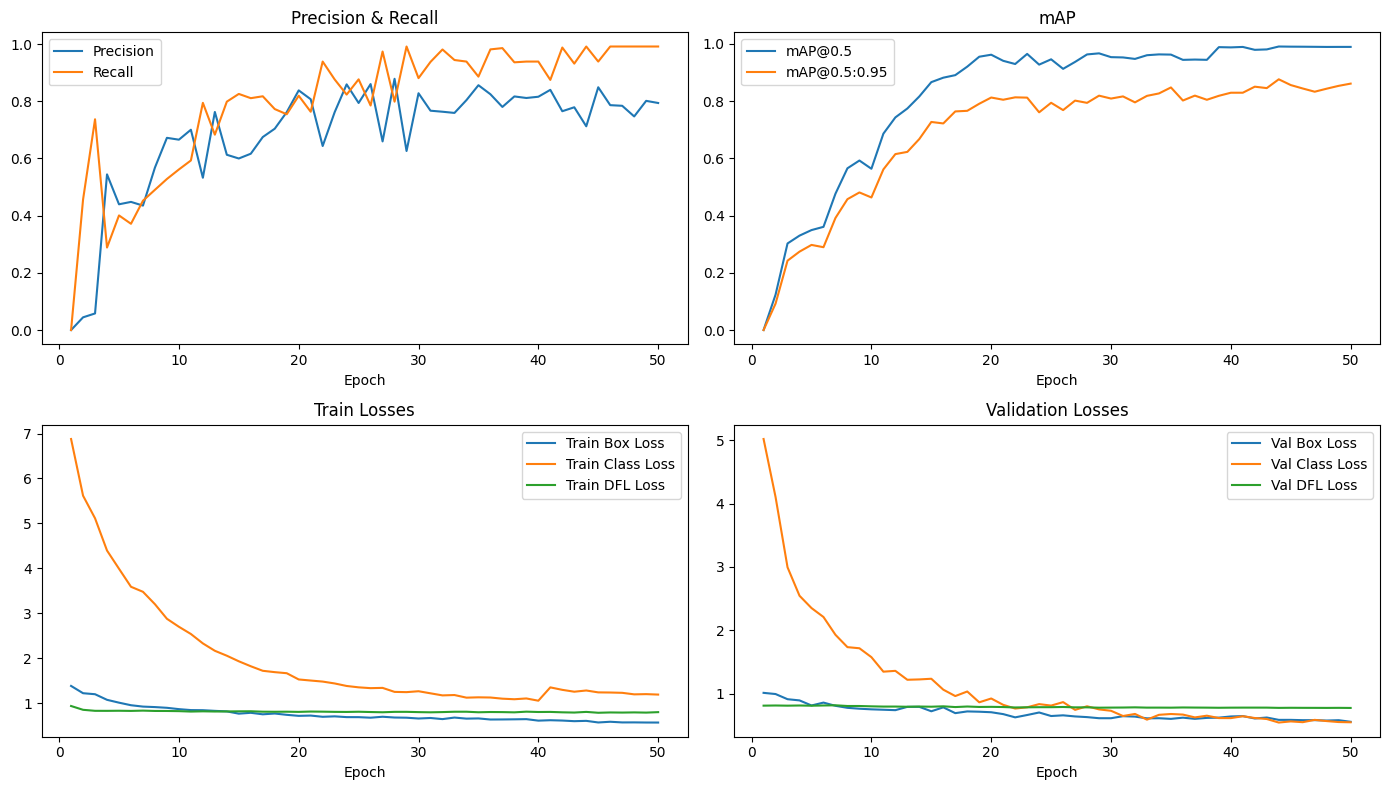

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

results_path = r"/kaggle/working/runs/detect/train4/results.csv"
df = pd.read_csv(results_path)

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.title('Precision & Recall')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.title('mAP')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss')
plt.title('Train Losses')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Class Loss')
plt.plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss')
plt.title('Validation Losses')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


# 3.	Улучшение бейзлайна
## Гипотеза: Использование модели с большим числом параметров даст большую точность по метриками map и map50

In [15]:
new_model = YOLO("yolov8m.pt")

new_model.train(data=r"/kaggle/input/wwwwwww/data_custom.yaml", epochs=50, imgsz=640, batch=16, device=0)

100%|██████████| 49.7M/49.7M [00:00<00:00, 242MB/s]


Ultralytics 8.3.135 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/wwwwwww/data_custom.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pr

train: Scanning /kaggle/input/traffic-sign-detection/train/labels... 678 images, 0 backgrounds, 0 corrupt: 100%|██████████| 678/678 [00:00<00:00, 1062.49it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/traffic-sign-detection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 2.6±2.0 ms, read: 298.4±144.6 MB/s, size: 528.0 KB)


val: Scanning /kaggle/input/traffic-sign-detection/val/labels... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<00:00, 407.81it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/traffic-sign-detection/val is not writeable, cache not saved.


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000256, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.38G      1.036      6.683     0.8841          8        640: 100%|██████████| 43/43 [00:22<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         25         31      0.579        0.5       0.56      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.71G     0.7533      2.647     0.8069         14        640: 100%|██████████| 43/43 [00:22<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         25         31        0.7      0.707      0.795      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.71G     0.7541      1.714      0.805         12        640: 100%|██████████| 43/43 [00:22<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         25         31      0.666      0.875      0.851      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.73G     0.6897      1.312     0.8021         11        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         25         31      0.717      0.816      0.881      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.79G     0.6805      1.055     0.8028         12        640: 100%|██████████| 43/43 [00:24<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         25         31      0.811      0.774      0.886      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.79G     0.6583     0.8582     0.8083          6        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         25         31      0.692      0.877      0.904       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.86G     0.6196     0.7514      0.799          8        640: 100%|██████████| 43/43 [00:23<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         25         31      0.749      0.909      0.969      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.86G     0.6249      0.734     0.7941         18        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         25         31      0.673          1      0.927       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.92G     0.5943     0.6585      0.798         18        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         25         31      0.827      0.908       0.95      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.93G     0.5983     0.6119     0.7947         16        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         25         31      0.788      0.923      0.966      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.99G     0.5832     0.5716     0.7903         14        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         25         31      0.868      0.932      0.994      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.99G     0.5803     0.5353      0.798         10        640: 100%|██████████| 43/43 [00:24<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         25         31       0.93      0.879      0.992      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.99G     0.6003     0.5514     0.7957         11        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         25         31      0.788      0.995      0.995      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.06G      0.569     0.4989     0.7917         15        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         25         31      0.858      0.934       0.99      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.06G     0.5528     0.4497     0.7956         10        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         25         31      0.717       0.99      0.969      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.09G     0.5733      0.453     0.7937         10        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         25         31       0.88      0.923      0.968      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.09G     0.5254     0.4121     0.7845         14        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         25         31      0.808      0.979      0.973      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.09G     0.5413     0.4278     0.7862         14        640: 100%|██████████| 43/43 [00:23<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         25         31      0.949      0.886      0.992      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.09G     0.5364     0.4065     0.7911         14        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         25         31      0.909      0.939      0.994      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.09G     0.5147     0.3897     0.7854         19        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         25         31      0.851      0.991      0.974      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.09G     0.5234      0.393     0.7909         11        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         25         31      0.926      0.991      0.988      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.09G     0.5014     0.3717     0.7876         16        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         25         31        0.9      0.939      0.991      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.09G     0.4955     0.3713     0.7852         15        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         25         31      0.881      0.975      0.989      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.09G     0.5021     0.3843     0.7871         12        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         25         31       0.92      0.939      0.994      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.09G       0.49     0.3517     0.7889         14        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         25         31      0.888      0.975      0.991      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.09G     0.4768     0.3431     0.7801         11        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         25         31      0.938      0.926      0.991      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.09G     0.4834     0.3457     0.7713         11        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         25         31      0.944      0.992      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.09G      0.473     0.3318     0.7831         15        640: 100%|██████████| 43/43 [00:23<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         25         31      0.944      0.954      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.09G     0.4699     0.3268     0.7864         15        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         25         31      0.965      0.935      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.09G     0.4718     0.3285     0.7772         10        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         25         31      0.968          1      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.09G     0.4584     0.3076     0.7754          8        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         25         31      0.953          1      0.995      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.09G     0.4443     0.3077     0.7812         11        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         25         31      0.965          1      0.995      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.09G     0.4699     0.3217     0.7856         15        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         25         31      0.927          1      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.09G     0.4633     0.3163     0.7854         14        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         25         31      0.872      0.986      0.986      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.09G     0.4319     0.3197     0.7764         16        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         25         31      0.852          1      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.09G     0.4302     0.3161     0.7815         12        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         25         31      0.906          1      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.09G     0.4317     0.2909     0.7813         10        640: 100%|██████████| 43/43 [00:23<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         25         31      0.902          1      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.09G     0.4472     0.3005     0.7745         19        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         25         31       0.94      0.979      0.989      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.09G     0.4348     0.2979     0.7898         18        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         25         31      0.947      0.991      0.992       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.09G     0.4196     0.2827      0.783         11        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         25         31      0.937      0.993      0.995      0.883


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.09G     0.4267     0.2869     0.7833          7        640: 100%|██████████| 43/43 [00:25<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         25         31      0.863      0.994      0.995      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.09G     0.4337     0.2858     0.7719          5        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         25         31      0.959      0.923      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.09G     0.4089     0.2728     0.7712          8        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         25         31      0.898       0.98      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.09G     0.4279     0.2852     0.7841          8        640: 100%|██████████| 43/43 [00:23<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         25         31      0.926      0.977      0.995      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.09G     0.3938     0.2603     0.7652          6        640: 100%|██████████| 43/43 [00:23<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         25         31      0.934      0.974      0.989      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.09G     0.3955     0.2639     0.7749          7        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         25         31      0.938      0.974      0.985      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.09G     0.3842     0.2553     0.7704          9        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         25         31       0.93      0.976      0.992      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.09G       0.38     0.2618     0.7751          5        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         25         31      0.929      0.977      0.989      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.09G      0.383     0.2473     0.7672          8        640: 100%|██████████| 43/43 [00:23<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         25         31      0.925      0.979      0.989      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.09G     0.3744     0.2428     0.7799          7        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         25         31      0.917      0.987      0.989      0.912



50 epochs completed in 0.347 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 52.1MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.135 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,860,025 parameters, 0 gradients, 78.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


                   all         25         31      0.852          1      0.995      0.919
   avalin-pich-be-chap          1          1      0.812          1      0.995      0.995
   avalin-pich-be-rast          3          3      0.896          1      0.995      0.957
            dast-andaz          1          1      0.813          1      0.995      0.995
faghat-obor-az-rast-mojaz          1          1      0.785          1      0.995      0.995
hadeaksar-sorat-mojaz-40          1          1      0.794          1      0.995      0.995
hadeaksar-sorat-mojaz-80          1          1          1          1      0.995      0.895
hadeaksar-sorat-mojaz-85          1          1       0.84          1      0.995      0.796
hadeaksar-sorat-mojaz-95          1          1      0.826          1      0.995      0.796
       hedayat-be-chap          2          2      0.856          1      0.995      0.796
       hedayat-be-rast          3          3      0.901          1      0.995      0.867
          

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 9.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  7, 11, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 28, 29, 32])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c2b0c3a2a90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,

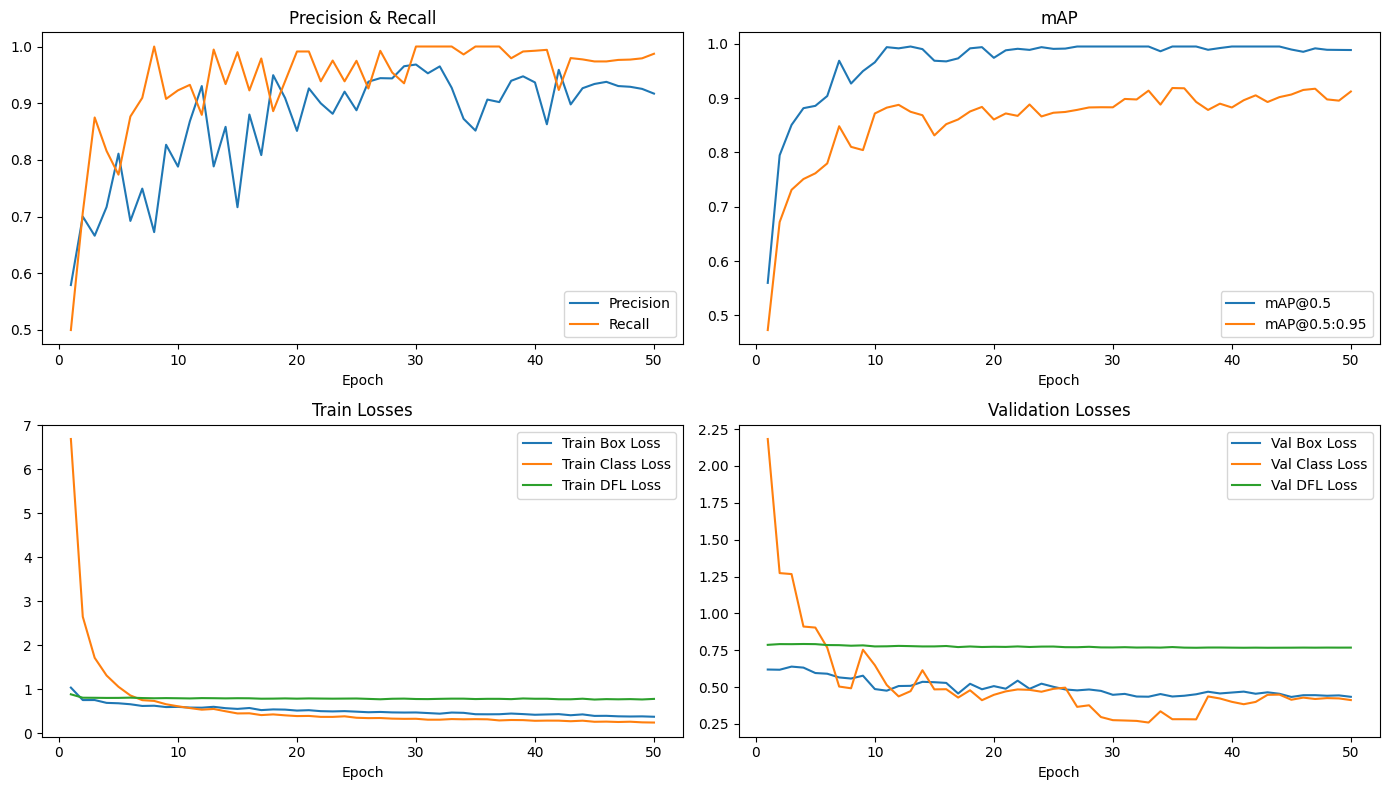

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

results_path = r"/kaggle/working/runs/detect/train5/results.csv"
df = pd.read_csv(results_path)

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.title('Precision & Recall')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.title('mAP')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss')
plt.title('Train Losses')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Class Loss')
plt.plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss')
plt.title('Validation Losses')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
res = model.val(data="/kaggle/input/wwwwwww/data_custom.yaml")

Ultralytics 8.3.135 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1496.1±819.3 MB/s, size: 1577.8 KB)


val: Scanning /kaggle/input/traffic-sign-detection/val/labels... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<00:00, 1098.93it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/traffic-sign-detection/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]


                   all         25         31      0.865      0.885       0.99      0.867
   avalin-pich-be-chap          1          1       0.84          1      0.995      0.796
   avalin-pich-be-rast          3          3       0.91          1      0.995      0.943
            dast-andaz          1          1      0.833          1      0.995      0.995
faghat-obor-az-rast-mojaz          1          1      0.943          1      0.995      0.895
hadeaksar-sorat-mojaz-40          1          1      0.808          1      0.995      0.895
hadeaksar-sorat-mojaz-80          1          1          1          0      0.995      0.895
hadeaksar-sorat-mojaz-85          1          1          1          0      0.995      0.697
hadeaksar-sorat-mojaz-95          1          1      0.496          1      0.995      0.697
       hedayat-be-chap          2          2      0.945          1      0.995       0.85
       hedayat-be-rast          3          3          1      0.976      0.995      0.766
          

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train43


In [21]:
res_new = new_model.val(data="/kaggle/input/wwwwwww/data_custom.yaml")

Ultralytics 8.3.135 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,860,025 parameters, 0 gradients, 78.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1006.0±924.0 MB/s, size: 1212.2 KB)


val: Scanning /kaggle/input/traffic-sign-detection/val/labels... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<00:00, 908.33it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/traffic-sign-detection/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]


                   all         25         31      0.855          1      0.995      0.913
   avalin-pich-be-chap          1          1      0.811          1      0.995      0.895
   avalin-pich-be-rast          3          3      0.895          1      0.995      0.995
            dast-andaz          1          1      0.815          1      0.995      0.995
faghat-obor-az-rast-mojaz          1          1      0.786          1      0.995      0.995
hadeaksar-sorat-mojaz-40          1          1      0.795          1      0.995      0.995
hadeaksar-sorat-mojaz-80          1          1          1          1      0.995      0.895
hadeaksar-sorat-mojaz-85          1          1      0.843          1      0.995      0.796
hadeaksar-sorat-mojaz-95          1          1      0.824          1      0.995      0.697
       hedayat-be-chap          2          2      0.857          1      0.995      0.796
       hedayat-be-rast          3          3      0.904          1      0.995      0.867
          

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 17.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train52


In [36]:
print("Базовый", f'mAP={res.box.map}', f'mAP50={res.box.map50}')
print("Улучшенный", f'mAP={res_new.box.map}', f'mAP50={res_new.box.map50}')

Базовый mAP=0.8668035836946486 mAP50=0.9897368421052634
Улучшенный mAP=0.9128282772832819 mAP50=0.9950000000000001


## Не трудно заметить по map и map50, что выдвинутая гипотеза оказалась верна. И medium модель справилась лучше nano версии.

# 4.	Имплементация алгоритма машинного обучения 

## Воссоздадим простую YOLOv1

In [40]:
import torch
import torch.nn as nn

class SimpleYOLO(nn.Module):
    def __init__(self, S=7, B=2, C=35):
        super(SimpleYOLO, self).__init__()
        self.S = S
        self.B = B
        self.C = C

        self.backbone = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.BatchNorm2d(192),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(192, 128, kernel_size=1),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.Conv2d(256, 256, kernel_size=1),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.LeakyReLU(0.1),
            nn.AdaptiveAvgPool2d((S, S)),
        )

        self.head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * S * S, 4096),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.5),
            nn.Linear(4096, S * S * (C + B * 5))
        )

    def forward(self, x):
        x = self.backbone(x)
        x = self.head(x)
        return x.view(-1, self.S, self.S, self.C + self.B * 5)



## Заведём класс для датасета

In [38]:
import os
import cv2
import torch
from torch.utils.data import Dataset
from torchvision import transforms

class YoloDataset(Dataset):
    def __init__(self, image_dir, label_dir, S=7, B=2, C=35, transform=None):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.transform = transform
        self.S = S
        self.B = B
        self.C = C
        self.images = [f for f in os.listdir(image_dir) if f.endswith(".jpg") or f.endswith(".png")]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        img_name = self.images[index]
        img_path = os.path.join(self.image_dir, img_name)
        label_path = os.path.join(self.label_dir, img_name.replace(".jpg", ".txt").replace(".png", ".txt"))

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        boxes = []
        if os.path.exists(label_path):
            with open(label_path) as f:
                for line in f.readlines():
                    class_label, x, y, w, h = map(float, line.strip().split())
                    boxes.append([int(class_label), x, y, w, h])

        if self.transform:
            image = self.transform(image)

        target = torch.zeros((self.S, self.S, self.C + self.B * 5))
        for box in boxes:
            class_label, x, y, w, h = box
            i, j = int(self.S * y), int(self.S * x)
            x_cell, y_cell = self.S * x - j, self.S * y - i
            w_cell, h_cell = w * self.S, h * self.S

            if target[i, j, self.C] == 0:
                target[i, j, self.C] = 1 
                target[i, j, self.C + 1:self.C + 5] = torch.tensor([x_cell, y_cell, w_cell, h_cell])
                target[i, j, int(class_label)] = 1 

        return image, target


## Попробуем обучить нашу модель

In [55]:
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((448, 448)),
])

train_dataset = YoloDataset(
    image_dir=r"/kaggle/input/traffic-sign-detection/train/images",
    label_dir=r"/kaggle/input/traffic-sign-detection/train/labels",
    transform=transform,
    C=35
)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

import torch.nn as nn

S = 7
B = 2
C = 35


criterion_class = nn.CrossEntropyLoss()
criterion_bbox = nn.MSELoss()


model = SimpleYOLO(S=S, B=B, C=C).cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(40):
    total_loss = 0
    for imgs, targets in train_loader:
        imgs, targets = imgs.cuda(), targets.cuda() 

        preds = model(imgs) 


        pred_boxes = preds[..., :B*5].reshape(-1, B, 5)     
        true_boxes = targets[..., :B*5].reshape(-1, B, 5)    

        pred_cls = preds[..., B*5:]                     
        true_cls = targets[..., B*5:].argmax(dim=-1) 

        loss_bbox = criterion_bbox(pred_boxes[..., :4], true_boxes[..., :4])
        loss_class = criterion_class(pred_cls.reshape(-1, C), true_cls.reshape(-1))
        
        loss = loss_class + loss_bbox

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch}: loss = {total_loss:.4f}")


Epoch 0: loss = 37.4692
Epoch 1: loss = 12.6654
Epoch 2: loss = 10.8441
Epoch 3: loss = 9.6656
Epoch 4: loss = 8.7257
Epoch 5: loss = 7.8272
Epoch 6: loss = 7.1542
Epoch 7: loss = 6.5133
Epoch 8: loss = 5.9579
Epoch 9: loss = 5.4749
Epoch 10: loss = 5.0071
Epoch 11: loss = 4.5941
Epoch 12: loss = 4.2018
Epoch 13: loss = 3.8367
Epoch 14: loss = 3.4933
Epoch 15: loss = 3.2354
Epoch 16: loss = 3.0018
Epoch 17: loss = 2.7848
Epoch 18: loss = 2.5244
Epoch 19: loss = 2.3079
Epoch 20: loss = 2.1615
Epoch 21: loss = 2.0206
Epoch 22: loss = 1.8208
Epoch 23: loss = 1.7235
Epoch 24: loss = 1.5786
Epoch 25: loss = 1.4879
Epoch 26: loss = 1.3843
Epoch 27: loss = 1.2400
Epoch 28: loss = 1.1532
Epoch 29: loss = 1.0856
Epoch 30: loss = 1.0323
Epoch 31: loss = 0.9782
Epoch 32: loss = 0.8683
Epoch 33: loss = 0.8369
Epoch 34: loss = 0.8168
Epoch 35: loss = 0.7347
Epoch 36: loss = 0.6807
Epoch 37: loss = 0.6441
Epoch 38: loss = 0.5815
Epoch 39: loss = 0.5395


## Нетрудно заметить, что loss совсем не охотно двигается к заветному 0. Это связано с тем, что в ultralistics модели предобучены на датасете COCO и исходя из этого эти модели так быстро теряют loss при переобучении. Но не смотря на это заметна правильная тенденция в обучении. Её показывает экспоненциональное замедление loss-а.

In [45]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((448, 448)),
])


val_dataset = YoloDataset(image_dir=r"/kaggle/input/traffic-sign-detection/val/images", label_dir=r"/kaggle/input/traffic-sign-detection/val/labels", transform=transform, C=35)


val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

In [59]:
from torchmetrics.detection import MeanAveragePrecision
from torchvision.ops import box_convert
from tqdm import tqdm

model.eval()
map_metric = MeanAveragePrecision()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with torch.no_grad():
    for imgs, targets in tqdm(val_loader):
        imgs = imgs.to(device)
        preds = model(imgs)

        batch_preds = []
        batch_targets = []

        for i in range(imgs.size(0)):
            pred = preds[i].detach().cpu()
            pred = pred.view(-1, model.C + model.B * 5)
            scores = torch.sigmoid(pred[:, model.C + 4])
            print(scores.min().item(), scores.max().item())
            labels = torch.argmax(pred[:, :model.C], dim=1)
            boxes = pred[:, model.C:model.C+4] 
            boxes = box_convert(boxes, in_fmt='cxcywh', out_fmt='xyxy')

            
            keep = scores > 0.01
            batch_preds.append({
                'boxes': boxes[keep],
                'scores': scores[keep],
                'labels': labels[keep]
            })

            
            target = targets[i].detach().cpu()
            target = target.view(-1, model.C + model.B * 5)
            obj_mask = target[:, model.C + 4] > 0

            if obj_mask.sum() == 0:
                batch_targets.append({'boxes': torch.zeros((0, 4)), 'labels': torch.zeros((0,), dtype=torch.int64)})
                continue

            tgt_boxes = target[obj_mask][:, model.C:model.C+4]
            tgt_labels = torch.argmax(target[obj_mask][:, :model.C], dim=1)
            tgt_boxes = box_convert(tgt_boxes, in_fmt='cxcywh', out_fmt='xyxy')

            batch_targets.append({
                'boxes': tgt_boxes,
                'labels': tgt_labels
            })
        print(f"Preds: {[len(p['boxes']) for p in batch_preds]}")
        print(f"GTs: {[len(t['boxes']) for t in batch_targets]}")
        map_metric.update(batch_preds, batch_targets)

result = map_metric.compute()
print(f"mAP50: {result['map_50'].item():.4f}, mAP: {result['map'].item():.4f}")

 25%|██▌       | 1/4 [00:00<00:02,  1.37it/s]

2.305291491211392e-05 0.03434775769710541
6.811864295741543e-05 0.05843586102128029
3.960884441767121e-06 0.014523092657327652
2.8440510504879057e-05 0.014250257052481174
0.00021933265088591725 0.015885401517152786
5.58823739993386e-06 0.008583318442106247
3.950669270125218e-05 0.018676111474633217
7.726596959400922e-05 0.013899627141654491
Preds: [2, 3, 1, 1, 4, 0, 1, 1]
GTs: [1, 1, 1, 1, 1, 1, 1, 1]


 50%|█████     | 2/4 [00:01<00:01,  1.29it/s]

5.467383380164392e-05 0.019300231710076332
1.6697758837835863e-05 0.02067866548895836
9.311869689554442e-06 0.02765350230038166
4.045443347422406e-06 0.003205163637176156
4.628170700016199e-06 0.03886169195175171
0.00010366888454882428 0.026406846940517426
8.261729817604646e-05 0.007630444131791592
2.5126072955572454e-07 0.004924561828374863
Preds: [1, 2, 1, 0, 1, 1, 0, 0]
GTs: [1, 1, 1, 2, 1, 1, 2, 1]


 75%|███████▌  | 3/4 [00:02<00:00,  1.06it/s]

1.9857912775478326e-05 0.017386553809046745
8.148287452058867e-05 0.018012026324868202
1.4397010090760887e-05 0.01119309850037098
1.089424313249765e-05 0.0054698968306183815
1.5461400835192762e-05 0.012183248065412045
5.8183635701425374e-05 0.0221709031611681
1.6602867617621087e-05 0.0768122747540474
4.5932061766507104e-05 0.004965641535818577
Preds: [1, 1, 2, 0, 1, 1, 2, 0]
GTs: [1, 1, 1, 1, 1, 1, 1, 1]


100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

4.872174031333998e-05 0.006985115818679333
Preds: [0]
GTs: [2]
mAP50: 0.0000, mAP: 0.0000


## Замерив метрики map и map 50 можно придти к выводу что обучения было недостаточно, но также возможна проблема в конфигурации модели. Но даже в случае хорошего обучения врядли бы наша модель хотя бы сравнилась с моделями представленными в ultralistics.